In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('Nutritional_Data.csv')
df1.head()

,Unnamed: 0,Fast Food Restaurant,Item,Type,Serving Size (g),Calories,Total Fat (g),Saturated Fat (g),Trans Fat (g),Sodium (mg),Carbs (g),Sugars (g),Protein (g)
0,0,McDonald's,Hamburger,Burger,98,240,8.0,3.0,0.0,480.0,32.0,6.0,12.0
1,1,McDonald's,Cheeseburger,Burger,113,290,11.0,5.0,0.5,680.0,33.0,7.0,15.0
2,2,McDonald's,?,Burger,211,530,27.0,10.0,1.0,960.0,47.0,9.0,24.0
3,3,McDonald's,Quarter Pounder with Cheese,Burger,202,520,26.0,12.0,1.5,1100.0,41.0,10.0,30.0
4,4,McDonald's,Bacon Clubhouse Burger,Burger,270,720,40.0,15.0,1.5,1470.0,51.0,14.0,39.0


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 13 columns):
Unnamed: 0              126 non-null int64
Fast Food Restaurant    126 non-null object
Item                    126 non-null object
Type                    126 non-null object
Serving Size (g)        126 non-null int64
Calories                126 non-null int64
Total Fat (g)           122 non-null float64
Saturated Fat (g)       126 non-null float64
Trans Fat (g)           114 non-null float64
Sodium (mg)             121 non-null float64
Carbs (g)               126 non-null float64
Sugars (g)              126 non-null float64
Protein (g)             122 non-null float64
dtypes: float64(7), int64(3), object(3)
memory usage: 12.9+ KB


In [4]:
df1['Item'].unique()
df1[df1 == '?'] = np.nan

c:\users\ashish bisht\appdata\local\programs\python\python37\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 13 columns):
Unnamed: 0              126 non-null int64
Fast Food Restaurant    126 non-null object
Item                    107 non-null object
Type                    126 non-null object
Serving Size (g)        126 non-null int64
Calories                126 non-null int64
Total Fat (g)           122 non-null float64
Saturated Fat (g)       126 non-null float64
Trans Fat (g)           114 non-null float64
Sodium (mg)             121 non-null float64
Carbs (g)               126 non-null float64
Sugars (g)              126 non-null float64
Protein (g)             122 non-null float64
dtypes: float64(7), int64(3), object(3)
memory usage: 12.9+ KB


In [6]:
df1.isnull().sum()

Unnamed: 0               0
Fast Food Restaurant     0
Item                    19
Type                     0
Serving Size (g)         0
Calories                 0
Total Fat (g)            4
Saturated Fat (g)        0
Trans Fat (g)           12
Sodium (mg)              5
Carbs (g)                0
Sugars (g)               0
Protein (g)              4
dtype: int64

In [7]:
len(df1['Item'].unique())

101

In [8]:
len(df1['Type'].unique())

6

In [9]:
df1.groupby(['Type']).mean()

,Unnamed: 0,Serving Size (g),Calories,Total Fat (g),Saturated Fat (g),Trans Fat (g),Sodium (mg),Carbs (g),Sugars (g),Protein (g)
Type,,,,,,,,,,
Breaded Chicken Sandwich,60.454545,215.727273,522.090909,26.018182,4.563636,0.010000,1080.636364,46.927273,6.581818,25.063636
Burger,61.391304,241.797101,620.202899,35.670769,13.563768,1.377419,1217.415385,42.721739,8.888406,31.520896
Chicken Nuggets,62.272727,100.545455,274.545455,17.372727,3.054545,0.010000,697.636364,15.136364,0.336364,15.327273
French Fries,68.333333,109.500000,314.083333,15.308333,2.891667,0.100000,375.833333,40.866667,0.191667,3.672727
Grilled Chicken Sandwich,61.090909,216.090909,408.000000,17.000000,3.863636,0.040000,1041.454545,38.200000,7.245455,30.590000
Milkshake,66.416667,367.000000,606.666667,22.583333,15.208333,0.590909,309.090909,89.583333,75.166667,11.500000


In [10]:
burger = df1.where(df1['Type'] == 'Burger')
burger[burger['Protein (g)'] == burger['Protein (g)'].max()]

,Unnamed: 0,Fast Food Restaurant,Item,Type,Serving Size (g),Calories,Total Fat (g),Saturated Fat (g),Trans Fat (g),Sodium (mg),Carbs (g),Sugars (g),Protein (g)
26,26.0,Wendy's,3/4 lb. Triple w/ Cheese,Burger,423.0,1090.0,66.0,29.0,4.0,1990.0,43.0,11.0,69.0


In [12]:
#Trans Fat (g) with the average of available Trans Fat (g) for each food Type

df1[['Trans Fat (g)','Type']].groupby(['Type']).mean()

,Trans Fat (g)
Type,
Breaded Chicken Sandwich,0.010000
Burger,1.377419
Chicken Nuggets,0.010000
French Fries,0.100000
Grilled Chicken Sandwich,0.040000
Milkshake,0.590909


In [13]:
nan_index = df1[df1['Trans Fat (g)'].isnull()].index
nan_index

Int64Index([87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98], dtype='int64')

In [14]:
df1[df1['Trans Fat (g)'].isnull()]

,Unnamed: 0,Fast Food Restaurant,Item,Type,Serving Size (g),Calories,Total Fat (g),Saturated Fat (g),Trans Fat (g),Sodium (mg),Carbs (g),Sugars (g),Protein (g)
87,87,Hardee's,Kids Hamburger,Burger,195,500,22.0,5.0,NaN,1080.0,61.0,7.0,16.0
88,88,Hardee's,Kids Cheeseburger,Burger,207,550,26.0,6.0,NaN,1300.0,61.0,7.0,18.0
89,89,Hardee's,1/3 LB Original Thickburger,Burger,358,820,43.0,16.0,NaN,1660.0,56.0,15.0,32.0
90,90,Hardee's,1/2 LB Original Thinkbuger,Burger,424,1030,70.0,24.0,NaN,2240.0,57.0,16.0,45.0
91,91,Hardee's,NaN,Burger,267,690,40.0,15.0,NaN,1630.0,52.0,11.0,34.0
92,92,Hardee's,1/3 LB Bacon Cheese Thickburger,Burger,348,900,59.0,18.0,NaN,1680.0,54.0,13.0,40.0
93,93,Hardee's,2/3 LB Double Thickburger,Burger,467,1140,79.0,27.0,NaN,2460.0,58.0,17.0,56.0
94,94,Hardee's,Charbroiled Chicken Club™ Sandwich,Grilled Chicken Sandwich,248,590,31.0,8.0,NaN,1510.0,35.0,9.0,42.0
95,95,Hardee's,Big Chicken Fillet Sandwich,Breaded Chicken Sandwich,329,750,42.0,8.0,NaN,1490.0,63.0,11.0,32.0
96,96,Hardee's,3 Piece Hand-Breaded Chicken Tenders,Chicken Nuggets,128,260,13.0,2.5,NaN,770.0,13.0,0.0,25.0


In [16]:
df1['Trans Fat (g)']= df1[['Trans Fat (g)','Type']].groupby(['Type']).transform(lambda x:x.fillna(x.mean()))



In [17]:
# Total Fat (g) with the average of available Total Fat (g) for each food Type
df1['Total Fat (g)']= df1[['Total Fat (g)','Type']].groupby(['Type']).transform(lambda x:x.fillna(x.mean()))

In [18]:
#Sodium (mg) with the average of available Sodium (mg) for each food Type

df1['Sodium (mg)']= df1[['Sodium (mg)','Type']].groupby(['Type']).transform(lambda x:x.fillna(x.mean()))


In [19]:
Fast_Food_Restaurant=pd.get_dummies(df1['Fast Food Restaurant'],columns='Fast Food Restaurant',prefix='Fast Food Restaurant')

df1=pd.concat([df1, Fast_Food_Restaurant], axis=1)
df1.drop(['Fast Food Restaurant'],axis=1,inplace= True)

In [20]:
df1.head()

,Unnamed: 0,Item,Type,Serving Size (g),Calories,Total Fat (g),Saturated Fat (g),Trans Fat (g),Sodium (mg),Carbs (g),...,Fast Food Restaurant_Chick-fil-A,Fast Food Restaurant_Dairy Queen,Fast Food Restaurant_Hardee's,Fast Food Restaurant_In-N-Out Burger,Fast Food Restaurant_Jack in the Box,Fast Food Restaurant_McDonald's,Fast Food Restaurant_Sonic,Fast Food Restaurant_Wendy's,Fast Food Restaurant_Whataburger,Fast Food Restaurant_White Castle
0,0,Hamburger,Burger,98,240,8.0,3.0,0.0,480.0,32.0,...,0,0,0,0,0,1,0,0,0,0
1,1,Cheeseburger,Burger,113,290,11.0,5.0,0.5,680.0,33.0,...,0,0,0,0,0,1,0,0,0,0
2,2,NaN,Burger,211,530,27.0,10.0,1.0,960.0,47.0,...,0,0,0,0,0,1,0,0,0,0
3,3,Quarter Pounder with Cheese,Burger,202,520,26.0,12.0,1.5,1100.0,41.0,...,0,0,0,0,0,1,0,0,0,0
4,4,Bacon Clubhouse Burger,Burger,270,720,40.0,15.0,1.5,1470.0,51.0,...,0,0,0,0,0,1,0,0,0,0


In [21]:
df1.drop('Item',axis=1,inplace=True)

In [22]:
#column Protein (g) with the average of available Protein (g) for each group of food Type

df1['Protein (g)']= df1[['Protein (g)','Type']].groupby(['Type']).transform(lambda x:x.fillna(x.mean()))

In [23]:
Type=pd.get_dummies(df1['Type'],columns='Type',prefix='Type')

df1[Type.columns] = Type
df1.drop('Type',axis = 1, inplace = True)
df1.head()

,Unnamed: 0,Serving Size (g),Calories,Total Fat (g),Saturated Fat (g),Trans Fat (g),Sodium (mg),Carbs (g),Sugars (g),Protein (g),...,Fast Food Restaurant_Sonic,Fast Food Restaurant_Wendy's,Fast Food Restaurant_Whataburger,Fast Food Restaurant_White Castle,Type_Breaded Chicken Sandwich,Type_Burger,Type_Chicken Nuggets,Type_French Fries,Type_Grilled Chicken Sandwich,Type_Milkshake
0,0,98,240,8.0,3.0,0.0,480.0,32.0,6.0,12.0,...,0,0,0,0,0,1,0,0,0,0
1,1,113,290,11.0,5.0,0.5,680.0,33.0,7.0,15.0,...,0,0,0,0,0,1,0,0,0,0
2,2,211,530,27.0,10.0,1.0,960.0,47.0,9.0,24.0,...,0,0,0,0,0,1,0,0,0,0
3,3,202,520,26.0,12.0,1.5,1100.0,41.0,10.0,30.0,...,0,0,0,0,0,1,0,0,0,0
4,4,270,720,40.0,15.0,1.5,1470.0,51.0,14.0,39.0,...,0,0,0,0,0,1,0,0,0,0


In [24]:
df1.drop('Unnamed: 0',axis = 1, inplace = True)

In [25]:
df1.shape

(126, 27)

In [26]:
X = df1.drop('Calories', axis =1)
y = df1['Calories']

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state =0 )

In [28]:
X_train_org

,Serving Size (g),Total Fat (g),Saturated Fat (g),Trans Fat (g),Sodium (mg),Carbs (g),Sugars (g),Protein (g),Fast Food Restaurant_Burger King,Fast Food Restaurant_Carl's Jr.,...,Fast Food Restaurant_Sonic,Fast Food Restaurant_Wendy's,Fast Food Restaurant_Whataburger,Fast Food Restaurant_White Castle,Type_Breaded Chicken Sandwich,Type_Burger,Type_Chicken Nuggets,Type_French Fries,Type_Grilled Chicken Sandwich,Type_Milkshake
62,80,12.000000,2.0,0.0,260.0,33.0,0.0,3.0,0,0,...,1,0,0,0,0,0,0,1,0,0
60,257,17.000000,2.0,0.0,1240.0,44.0,7.0,32.0,0,0,...,1,0,0,0,0,0,0,0,1,0
125,321,29.000000,19.0,1.0,320.0,72.0,65.0,10.0,0,0,...,0,0,0,0,0,0,0,0,0,1
78,250,35.000000,14.0,1.0,1650.0,75.0,16.0,36.0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,202,26.000000,12.0,1.5,1100.0,41.0,10.0,30.0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,226,34.000000,16.0,1.5,1240.0,35.0,9.0,37.0,0,0,...,0,0,0,0,0,1,0,0,0,0
64,227,35.670769,11.0,1.0,1110.0,43.0,10.0,25.0,0,0,...,0,0,0,0,0,1,0,0,0,0
117,285,22.000000,4.0,0.0,1050.0,69.0,14.0,29.0,0,0,...,0,0,1,0,0,0,0,0,1,0
47,376,38.000000,26.0,1.5,300.0,101.0,88.0,13.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
scaler = StandardScaler()

scaler.fit(X_train_org)

X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [30]:
X_test_df1 = pd.DataFrame(X_test, columns = X.columns)
X_test_df1.head()


,Serving Size (g),Total Fat (g),Saturated Fat (g),Trans Fat (g),Sodium (mg),Carbs (g),Sugars (g),Protein (g),Fast Food Restaurant_Burger King,Fast Food Restaurant_Carl's Jr.,...,Fast Food Restaurant_Sonic,Fast Food Restaurant_Wendy's,Fast Food Restaurant_Whataburger,Fast Food Restaurant_White Castle,Type_Breaded Chicken Sandwich,Type_Burger,Type_Chicken Nuggets,Type_French Fries,Type_Grilled Chicken Sandwich,Type_Milkshake
0,-0.242240,-1.127934,-1.045280,-0.896130,-0.273905,-0.157739,-0.275591,0.224428,-0.325396,-0.345033,...,-0.304997,-0.283654,-0.325396,-0.304997,-0.283654,-1.112697,-0.325396,-0.325396,3.525418,-0.345033
1,-1.366151,-0.654211,-1.045280,-0.896130,-0.691362,-1.487765,-0.638159,-1.028180,-0.325396,-0.345033,...,-0.304997,-0.283654,-0.325396,-0.304997,-0.283654,-1.112697,3.073181,-0.325396,-0.283654,-0.345033
2,-0.415853,0.115588,0.227141,0.753252,0.390230,-0.111876,-0.366233,0.290355,-0.325396,-0.345033,...,-0.304997,-0.283654,-0.325396,-0.304997,-0.283654,0.898717,-0.325396,-0.325396,-0.283654,-0.345033
3,0.187221,0.174803,0.354383,1.303046,0.485106,-0.157739,-0.184948,0.356282,-0.325396,-0.345033,...,-0.304997,3.525418,-0.325396,-0.304997,-0.283654,0.898717,-0.325396,-0.325396,-0.283654,-0.345033
4,-0.644290,0.451385,-0.281828,0.203458,-0.084152,-0.524643,-0.275591,-0.237059,-0.325396,-0.345033,...,-0.304997,-0.283654,-0.325396,-0.304997,-0.283654,0.898717,-0.325396,-0.325396,-0.283654,-0.345033


In [31]:
X_test_df1['Carbs (g)'].mean()

-0.15659275179192325

In [32]:
X_test_df1['Saturated Fat (g)'].min()


-1.1089009844963726

In [33]:
X_test_df1['Saturated Fat (g)'].max()

2.3902555644820493

In [34]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)
print(lreg.score(X_train, y_train))
print(lreg.score(X_test, y_test))

0.9858069698716861
0.9738501919623319


In [35]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

Text(0.5, 0, '$\\alpha$')

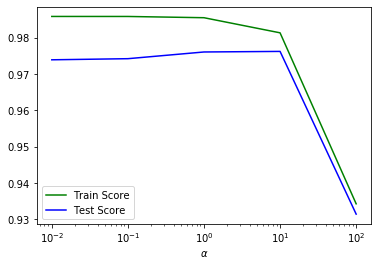

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [37]:
print(train_score_list)
print(test_score_list)

[0.9858069080239396, 0.9858011556908024, 0.9854583095429585, 0.9813032415537624, 0.93429252394459]
[0.97388638472584, 0.9741933946800659, 0.9760369536646056, 0.9761933963288152, 0.9314617401642724]


In [38]:
ridge.coef_

array([36.33293158, 40.65760837, 37.75044637, 27.89494183, 27.86859507,
       24.44339698,  9.20164979, 33.83957117,  0.17292334,  1.75129523,
       -7.51407435,  0.69801244,  6.89562648, -1.62310601, -1.3065433 ,
       -3.74292876,  5.08717159, -2.04684386,  4.20824406, -5.10033634,
        8.7553346 ,  1.17251526, -8.82138705,  0.11549813, -5.08329886,
        3.29089764])

In [39]:
ridge.intercept_

533.9468085106383

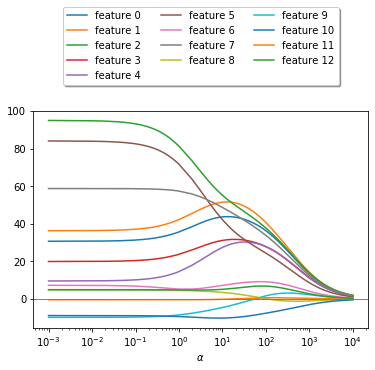

In [40]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [41]:
ridge = Ridge(alpha = 0.5)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.9857
Test score: 0.9752


In [42]:
ridge = Ridge(alpha = 15)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.9794
Test score: 0.9748


In [43]:
ridge = Ridge(alpha = 35)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.9707
Test score: 0.9672


In [44]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

c:\users\ashish bisht\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3346.5025545304816, tolerance: 573.0534734042554
  positive)


Text(0.5, 0, '$\\alpha$')

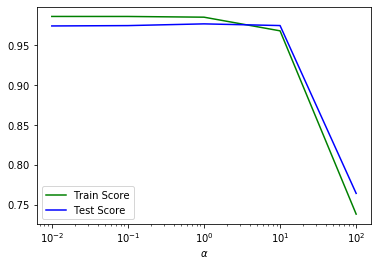

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [46]:
print(train_score_list)
print(test_score_list)

[0.9858067149377853, 0.985781943391695, 0.9848821623388792, 0.9677729618260756, 0.7382465499226671]
[0.9738978073187712, 0.9743373583097277, 0.9765028987131753, 0.9743954749087322, 0.7642181123790351]


c:\users\ashish bisht\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2033.541832489078, tolerance: 573.0534734042554
  positive)
c:\users\ashish bisht\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3306.272134939587, tolerance: 573.0534734042554
  positive)
c:\users\ashish bisht\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3319.7418580436715, tolerance: 573.0534734042554
  positive)
c:\users\ashish bisht\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear

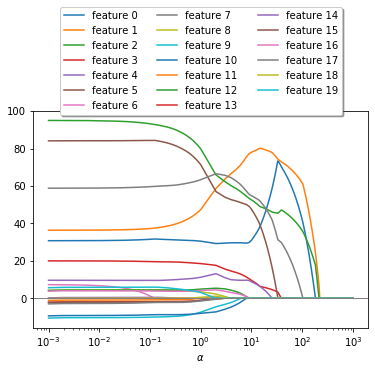

In [47]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,20):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [48]:
lasso = Lasso(alpha = 0.01)
lasso.fit(X_train,y_train)
print('Train score: {:.4f}'.format(lasso.score(X_train,y_train)))
print('Test score: {:.4f}'.format(lasso.score(X_test, y_test)))

Train score: 0.9858
Test score: 0.9739


c:\users\ashish bisht\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3346.5025545304816, tolerance: 573.0534734042554
  positive)


In [49]:
lasso = Lasso(alpha = 10)
lasso.fit(X_train,y_train)
print('Train score: {:.4f}'.format(lasso.score(X_train,y_train)))
print('Test score: {:.4f}'.format(lasso.score(X_test, y_test)))

Train score: 0.9678
Test score: 0.9744


In [50]:
lasso = Lasso(alpha = 35)
lasso.fit(X_train,y_train)
print('Train score: {:.4f}'.format(lasso.score(X_train,y_train)))
print('Test score: {:.4f}'.format(lasso.score(X_test, y_test)))

Train score: 0.9240
Test score: 0.9460


In [51]:
from  sklearn.preprocessing import PolynomialFeatures


In [52]:
train_score_list = []
test_score_list = []


poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lreg.fit(X_train_poly, y_train)
train_score_list.append(lreg.score(X_train_poly, y_train))
test_score_list.append(lreg.score(X_test_poly, y_test))

In [53]:
print(train_score_list)
print(test_score_list)

[1.0]
[0.9030925759080207]


In [54]:
#Fit a DecisionTreeRegressormodel on this dataset with the following list of hyperparameters:



#random_state = 0 
#min_samples_leaf= 5


#What is the train score of this model? Enter your answer with 4 significant digits.

%matplotlib notebook
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

X = df1.drop('Calories', axis =1)
y = df1['Calories']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state =0 )


tree = DecisionTreeRegressor(random_state = 0, min_samples_leaf= 5)

tree.fit(X_train, y_train)



DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [55]:
tree.score(X_train,y_train)

0.9558531208783227

In [56]:
tree.score(X_test,y_test)

0.8447792566558974